In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf
#seaborn theme
import seaborn as sns
sns.set(font='Arial')

In [2]:
sc = StatsCan()
#sc.update_tables()
pop_est = sc.table_to_df("17-10-0135-01")
df = sc.table_to_df("17-10-0136-01")

In [3]:
edm_pop_est = pop_est[pop_est['GEO']=="Edmonton (CMA), Alberta"]
edm_pop_est = edm_pop_est.filter(items = ['REF_DATE','Sex','Age group', 'VALUE'])
edm_pop_est_all = edm_pop_est[(edm_pop_est['Sex']=='Both sexes') & (edm_pop_est['Age group'] == 'All ages')]
edm_pop_est_all=edm_pop_est_all.set_index('REF_DATE')

C:\Users\mmak\AppData\Local\Temp\ipykernel_3780\717095708.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=edm_pop_est_all.index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")


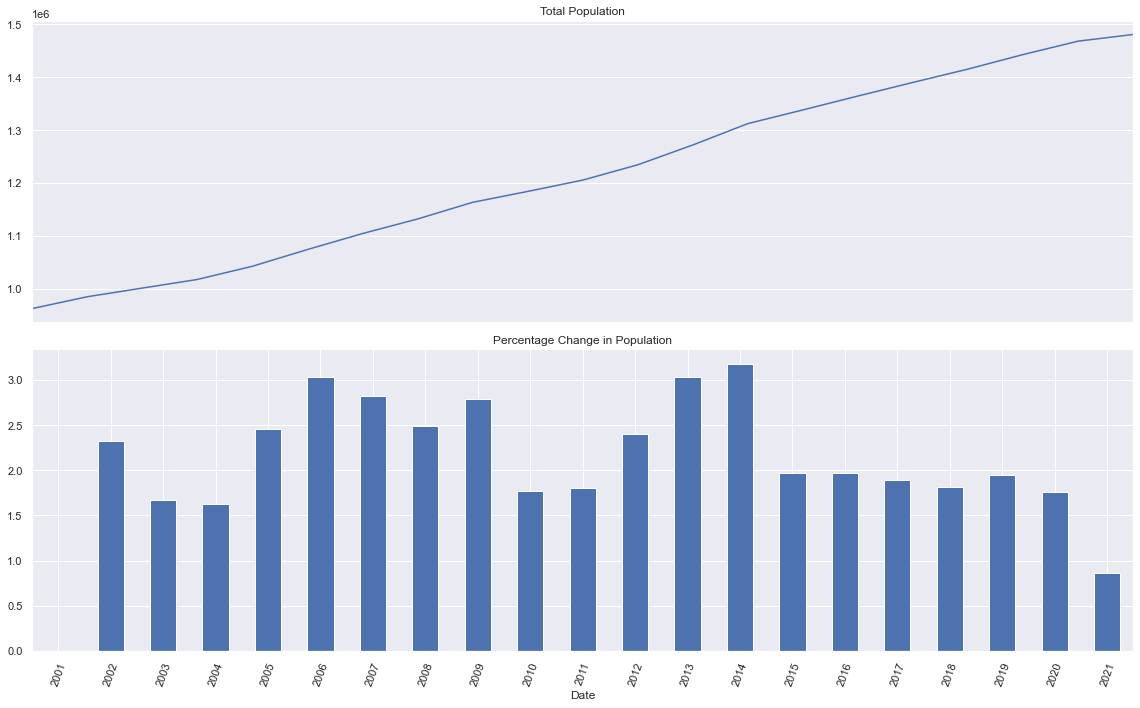

In [4]:
edm_pop_est_all['pop_change']= edm_pop_est_all['VALUE'].pct_change(1)*100

fig, ax = plt.subplots(nrows=2,figsize=(16,10))

edm_pop_est_all[['VALUE']].plot(ax=ax[0],title='Total Population', legend=False, xlabel='')

edm_pop_est_all['pop_change'].plot(ax=ax[1],title='Percentage Change in Population', kind='bar',xlabel='Date')

ax[0].set_xticklabels(labels=edm_pop_est_all.index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")
ax[0].get_xaxis().set_visible(False)
ax[1].set_xticklabels(labels=edm_pop_est_all.index.to_period('A'), rotation=70, rotation_mode="anchor", ha="right")


plt.tight_layout()
plt.savefig('edmonton/edm_population.png')


In [5]:
world_mig = sc.table_to_df('17-10-0040-01')
prov_mig = sc.table_to_df('17-10-0020-01')
nat_pop = sc.table_to_df('17-10-0059-01')


In [6]:
prov_mig.rename(columns={"Interprovincial migration":"Components of population growth"},inplace=True)
migrate = world_mig.append(prov_mig)
nat_pop.rename(columns={"Estimates":"Components of population growth"},inplace=True)
migrate = migrate.append(nat_pop)
ab_migrate=migrate[migrate['GEO']=='Alberta']
ab_migrate.dropna(subset=['Components of population growth'],inplace=True)
ab_pivot = ab_migrate.pivot(index='REF_DATE',columns='Components of population growth',values='VALUE')

C:\Users\mmak\AppData\Local\Temp\ipykernel_3780\3159852483.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  migrate = world_mig.append(prov_mig)
C:\Users\mmak\AppData\Local\Temp\ipykernel_3780\3159852483.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  migrate = migrate.append(nat_pop)
C:\Users\mmak\AppData\Local\Temp\ipykernel_3780\3159852483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_migrate.dropna(subset=['Components of population growth'],inplace=True)


In [7]:
ab_pivot['Net interprovincial migration']=ab_pivot['In-migrants']-ab_pivot['Out-migrants']

ab_pivot['Net international migration']=ab_pivot['Immigrants']+ab_pivot['Net non-permanent residents']-ab_pivot['Emigrants']-ab_pivot['Net temporary emigrants']+ab_pivot['Returning emigrants']

ab_pivot['Total net migration']=ab_pivot['Net interprovincial migration']+ab_pivot['Net international migration']

ab_pivot['Net population growth']=ab_pivot['Total net migration']+ ab_pivot['Births']-ab_pivot['Deaths']

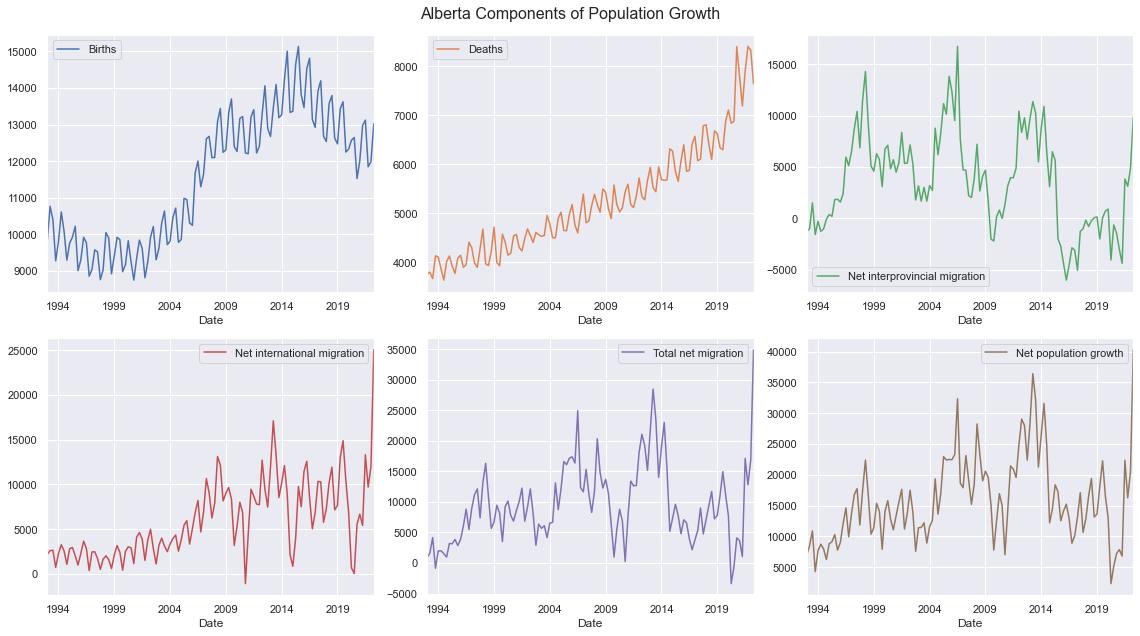

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,9))
fig.suptitle('Alberta Components of Population Growth', fontsize=16)


ab_pivot[['Births','Deaths','Net interprovincial migration','Net international migration','Total net migration','Net population growth']]['1993':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('edmonton/ab_popchange.png')

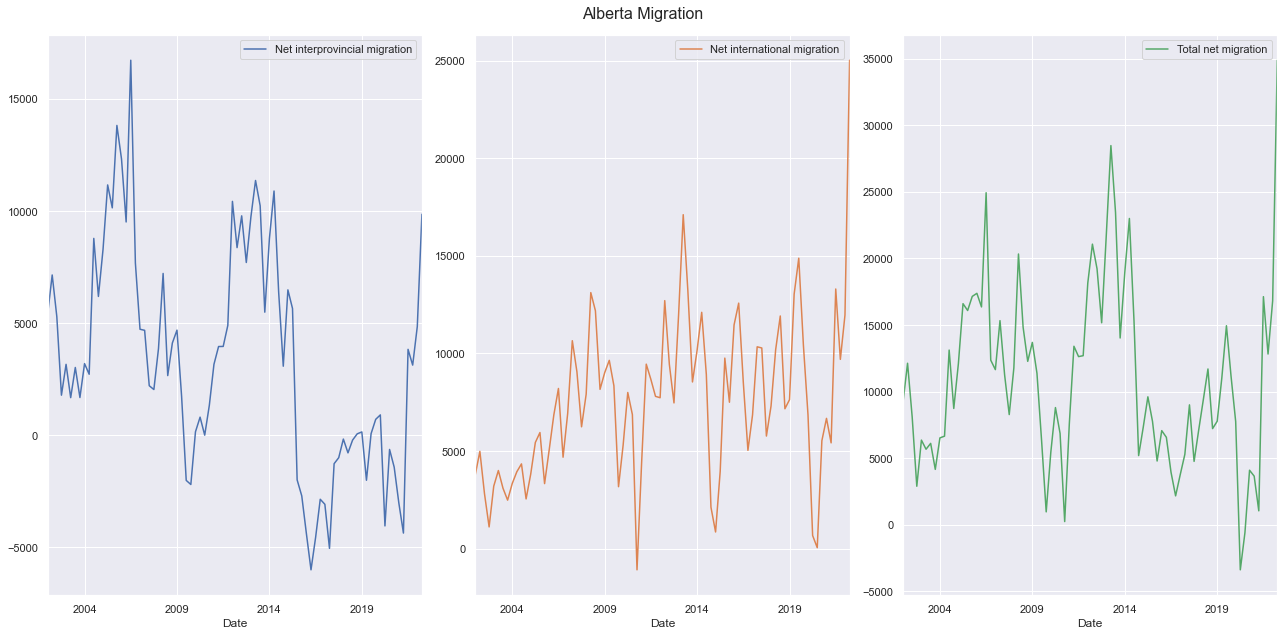

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(18,9))
fig.suptitle('Alberta Migration', fontsize=16)


ab_pivot[['Net interprovincial migration','Net international migration','Total net migration']]['2002':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('edmonton/ab_migration.png')

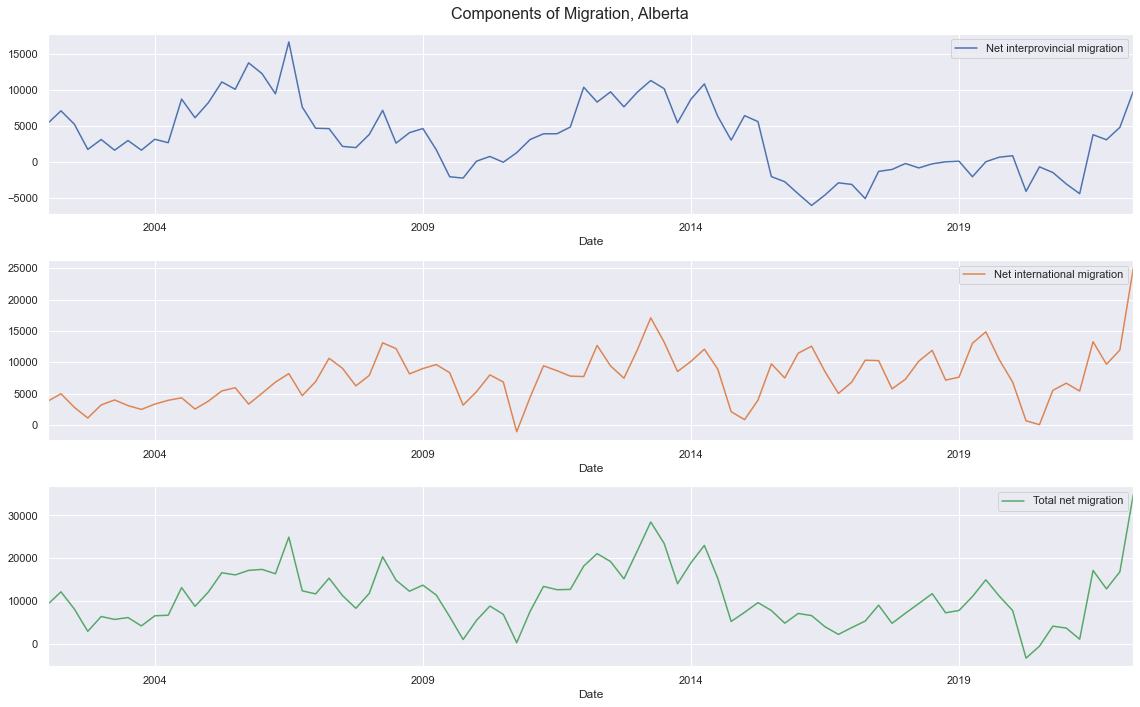

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(16,10))
fig.suptitle('Components of Migration, Alberta', fontsize=16)


ab_pivot[['Net interprovincial migration','Net international migration','Total net migration']]['2002':].plot(subplots=True,xlabel='Date',ax=ax)
plt.tight_layout()
plt.savefig('edmonton/ab_migration.png')

In [11]:
mortgage_rate = sc.table_to_df('34-10-0145-01')[['REF_DATE','VALUE']]

In [12]:
mortgage_rate.columns = ['Date','5 Year Conventional Mortgage Rate']

In [13]:
mortgage_rate=mortgage_rate.set_index('Date')

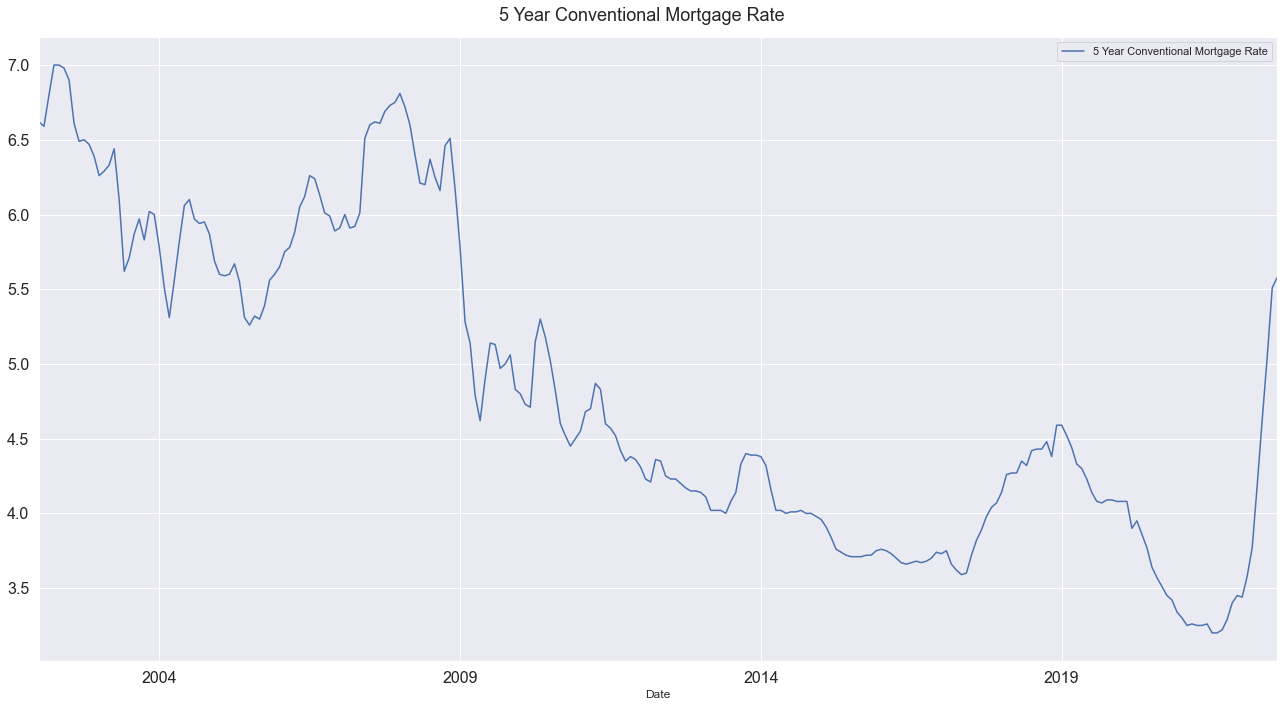

In [38]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('5 Year Conventional Mortgage Rate', fontsize=18)

mortgage_rate['2002':].plot(legend='false',fontsize=16,ax=ax)
plt.tight_layout()
plt.savefig('edmonton/5yearmortgage.png')

In [15]:
prices = pd.read_excel('./edmonton/chba_prez.xlsx',sheet_name='prices',engine='openpyxl',index_col=0)

In [16]:
prices

,"Average, All Types",Single Detached,Apartment/Condos,Other
Date,,,,
2002-01-01,142188,162780,98554,95748.622222
2002-02-01,140385,164680,97213,81177.870000
2002-03-01,149239,171849,105047,114947.172043
2002-04-01,147213,169513,108036,92715.636364
2002-05-01,153487,174916,110632,103538.017857
...,...,...,...,...
2022-04-01,417465,510988,237249,377813.264151
2022-05-01,410276,492037,239011,363826.384040
2022-06-01,405776,494302,238377,350773.384409


In [17]:
mortgage_rate['2002':]

,5 Year Conventional Mortgage Rate
Date,
2002-01-01,6.62
2002-02-01,6.59
2002-03-01,6.80
2002-04-01,7.00
2002-05-01,7.00
...,...
2022-04-01,4.19
2022-05-01,4.63
2022-06-01,5.05


In [18]:
mtg_pmt = []
payment_period = 25*12
for i in range(len(mortgage_rate['2002':])):
    rate = mortgage_rate['2002':]['5 Year Conventional Mortgage Rate'].iloc[i]/100
    price = prices['Average, All Types'].iloc[i]
    down = 0.05
    mli = 0.04
    principal = price - (down*price)
    mtgi_premium = mli*principal
    total_mtg = principal+mtgi_premium
    month_pay = (rate/12)*(1/(1-(1+rate/12)**(-payment_period)))*total_mtg
    mtg_pmt.append(month_pay)



In [22]:
prices['Average Mortgage Payment']=mtg_pmt

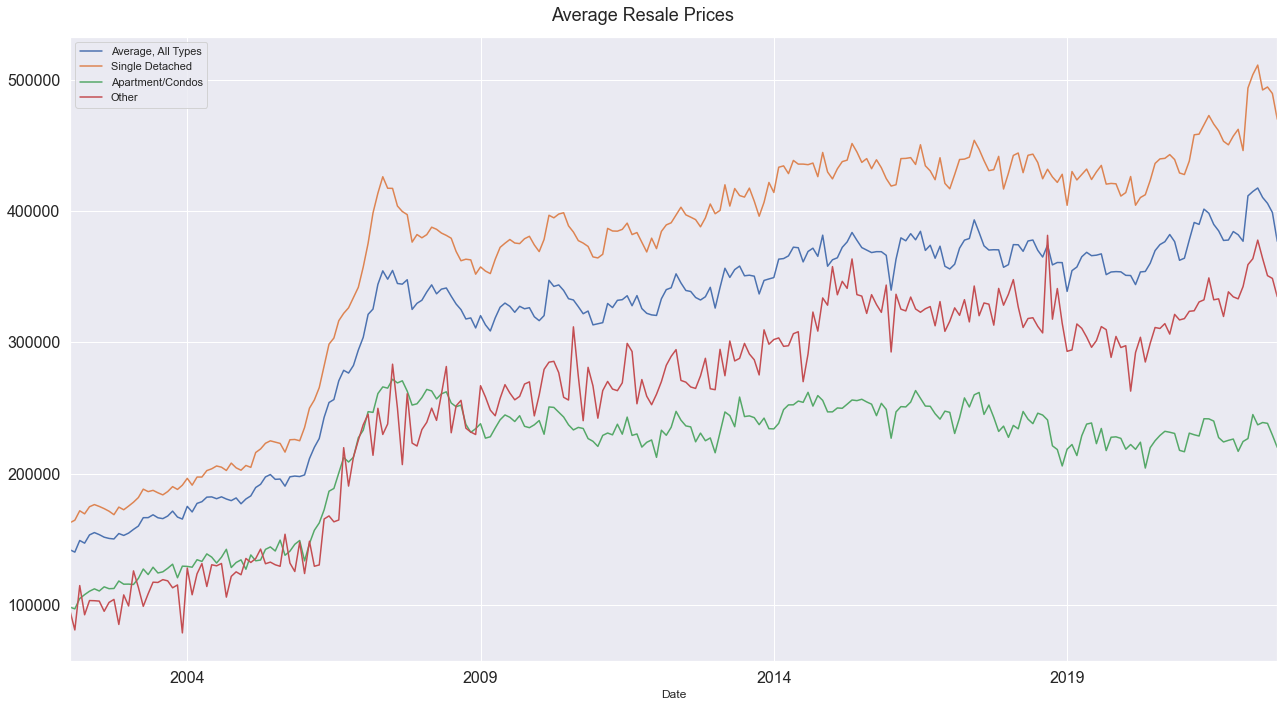

In [41]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Average Resale Prices', fontsize=18)

prices[['Average, All Types','Single Detached','Apartment/Condos','Other']].plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()
plt.savefig('edmonton/resale_prices.png')

In [31]:
prices.tail(12)

,"Average, All Types",Single Detached,Apartment/Condos,Other,Average Mortgage Payment
Date,,,,,
2021-09-01,377554,453011,224212,319683.191729,1811.897169
2021-10-01,377848,450306,225449,338443.276978,1827.116760
2021-11-01,384319,456956,226433,334627.508591,1880.600297
2021-12-01,381868,462110,217065,333111.863415,1878.678504
2022-01-01,376923,445932,224566,342485.429268,1852.359893
2022-02-01,411464,493543,226811,359133.774194,2052.650851
2022-03-01,414788,503711,245070,363648.227006,2111.427503
2022-04-01,417465,510988,237249,377813.264151,2220.594360
2022-05-01,410276,492037,239011,363826.384040,2283.096365


In [95]:
sales=pd.read_excel('./edmonton/chba_prez.xlsx',sheet_name='sales',engine='openpyxl',index_col=0)

In [98]:
sales = sales.resample('Q').sum()

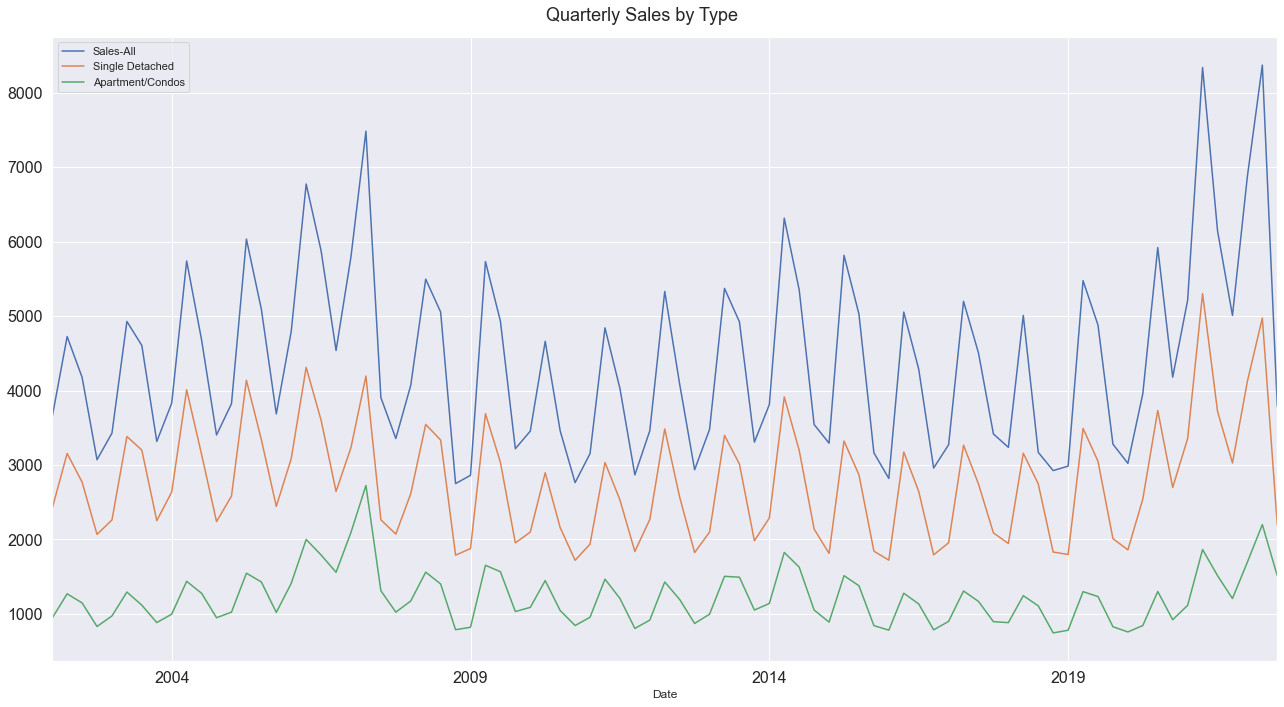

In [100]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Quarterly Sales by Type', fontsize=18)

sales[['Sales-All','Single Detached','Apartment/Condos']].plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()
plt.savefig('edmonton/q_sales.png')

In [43]:
wages = sc.table_to_df('14-10-0203-01')

In [57]:
wages['North American Industry Classification System (NAICS)'].unique()

array(['Industrial aggregate excluding unclassified businesses [11-91N]',
       'Goods producing industries [11-33N]',
       'Forestry, logging and support [11N]',
       'Forestry and logging [113]', 'Logging [1133]',
       'Support activities for forestry [1153]',
       'Mining, quarrying, and oil and gas extraction [21]',
       'Oil and gas extraction [211,2111]',
       'Mining and quarrying (except oil and gas) [212]',
       'Coal mining [2121]', 'Metal ore mining [2122]',
       'Non-metallic mineral mining and quarrying [2123]',
       'Support activities for mining, and oil and gas extraction [213,2131]',
       'Utilities [22,221]',
       'Electric power generation, transmission and distribution [2211]',
       'Natural gas distribution [2212]',
       'Water, sewage and other systems [2213]', 'Construction [23]',
       'Construction of buildings [236]',
       'Residential building construction [2361]',
       'Non-residential building construction [2362]',
       'He

In [60]:
agg_wages = wages[(wages['GEO']=='Alberta') & (wages['Overtime']=='Including overtime') &(wages['Type of employees']=='All employees') &(wages['North American Industry Classification System (NAICS)']=='Industrial aggregate excluding unclassified businesses [11-91N]')].set_index('REF_DATE')

In [64]:
prices['Average Weekly Wages']=agg_wages['2002':]['VALUE']

In [65]:
prices

,"Average, All Types",Single Detached,Apartment/Condos,Other,Average Mortgage Payment,Average Weekly Wages
Date,,,,,,
2002-01-01,142188,162780,98554,95748.622222,959.103519,682.66
2002-02-01,140385,164680,97213,81177.870000,944.330042,687.96
2002-03-01,149239,171849,105047,114947.172043,1023.396347,692.41
2002-04-01,147213,169513,108036,92715.636364,1027.985209,695.71
2002-05-01,153487,174916,110632,103538.017857,1071.796416,680.48
...,...,...,...,...,...,...
2022-04-01,417465,510988,237249,377813.264151,2220.594360,1247.14
2022-05-01,410276,492037,239011,363826.384040,2283.096365,1249.94
2022-06-01,405776,494302,238377,350773.384409,2355.354326,1245.04


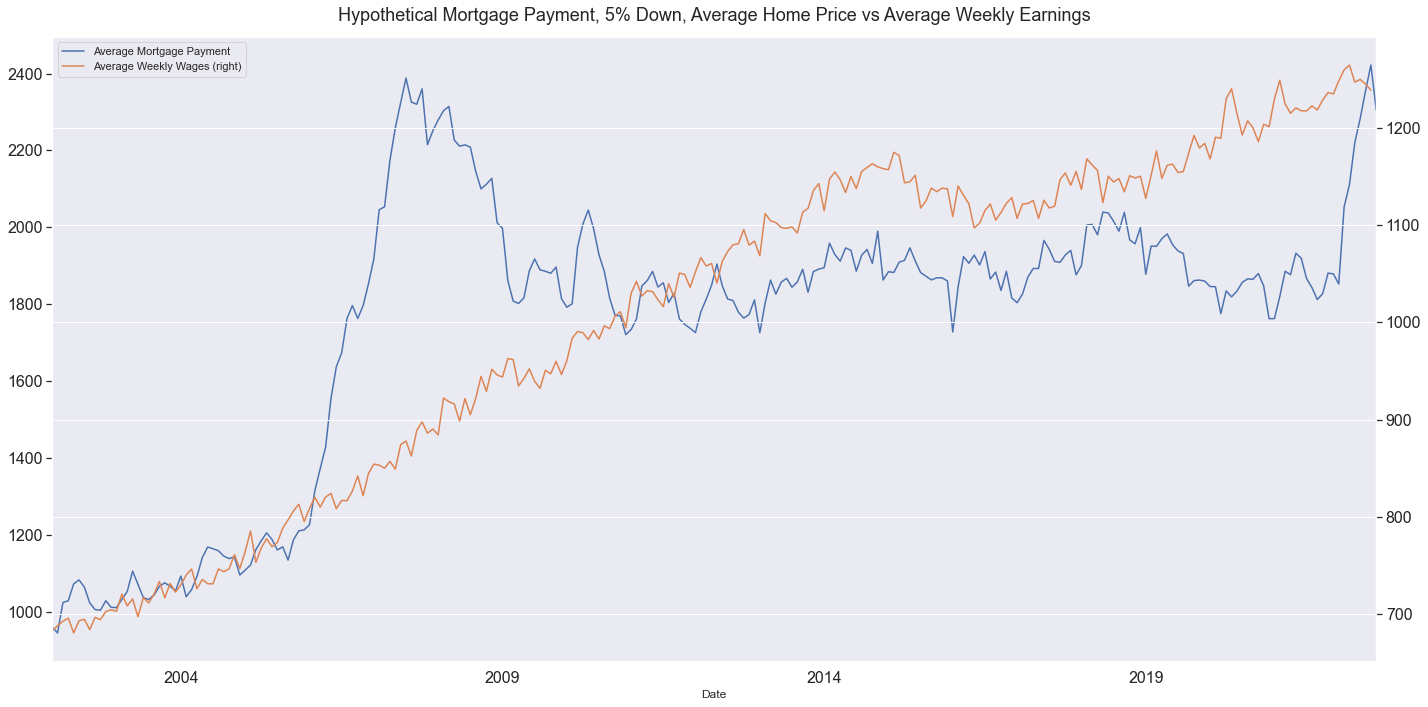

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Hypothetical Mortgage Payment, 5% Down, Average Home Price vs Average Weekly Earnings', fontsize=18)

prices[['Average Mortgage Payment']].plot(ax=ax,fontsize=16)
prices[['Average Weekly Wages']].plot(ax=ax,fontsize=16,secondary_y=True)
plt.tight_layout()
plt.savefig('edmonton/mtg_payment.png')

In [72]:
building_cost = sc.table_to_df('18-10-0135-01')

18100135-eng.zip: 100%|██████████| 177k/177k [00:00<00:00, 231kB/s]  


In [73]:
building_cost_edm = building_cost[building_cost['GEO']=='Edmonton, Alberta']
building_cost_edm=building_cost_edm.filter(items = ['REF_DATE','Type of building', 'VALUE'])


In [76]:
building_cost_edm=building_cost_edm.pivot(index='REF_DATE',columns='Type of building',values="VALUE")

In [101]:
building_cost_edm.diff(4)

Type of building,Apartment buildings,Bus depot with maintenance and repair facilities,Commercial buildings [62212],Factory,High-rise apartment building (five or more storeys),Industrial buildings [62211],Institutional buildings [62213],Low-rise apartment building (fewer than five storeys),Non-residential buildings [622],Office building,Residential buildings [621],School,Shopping centre,Single-detached house,Townhouse,Warehouse
REF_DATE,,,,,,,,,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,NaN,5.0,4.6,NaN,4.6,4.2,NaN,4.7,3.7,NaN,4.2,5.0,NaN,NaN,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,22.7,7.2,6.4,9.6,5.9,8.5,4.6,24.8,6.3,4.4,24.2,4.6,5.0,24.5,26.3,8.6
2021-07-01,25.3,11.0,10.0,14.2,8.0,12.7,7.3,27.3,9.7,7.5,27.6,7.3,7.7,28.2,29.5,13.0
2021-10-01,27.2,16.5,14.1,19.5,11.4,17.8,10.0,28.9,13.6,10.3,28.4,10.0,11.7,28.7,29.9,17.8


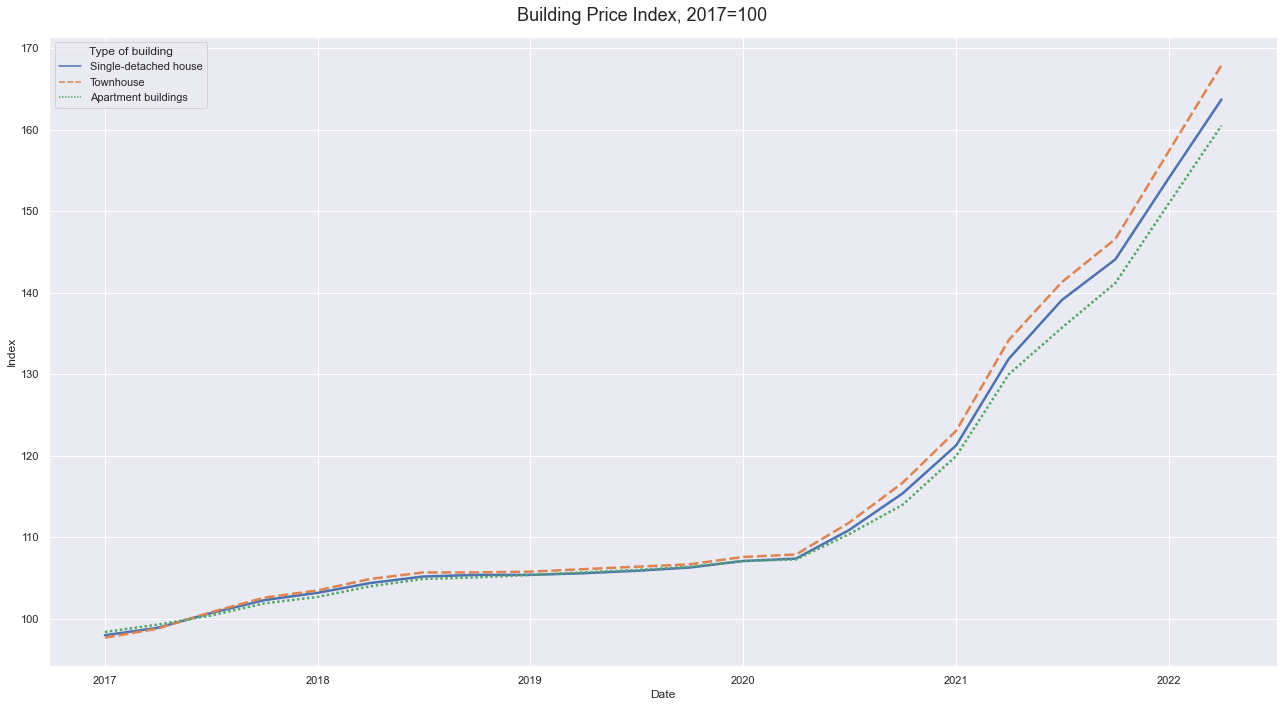

In [86]:
fig,ax=plt.subplots(figsize=(18,10))

sns.lineplot(data=building_cost_edm[['Single-detached house','Townhouse','Apartment buildings']],linewidth=2.5,ax=ax)
ax.set_ylabel('Index')
ax.set_xlabel('Date')
fig.suptitle('Building Price Index, 2017=100',fontsize=18)
fig.tight_layout()
plt.savefig('edmonton/building_price.png')

In [17]:
apt_price_indx = sc.table_to_df('18-10-0273-01')

18100273-eng.zip: 100%|██████████| 3.41k/3.41k [00:00<00:00, 568kB/s]
